# Image resizing and changing

Here is the code for resizing image using bilinear interpolation and for moving its colors to some value.

Using bilinear interpolation you can change the size of your photos, but the results will be better if you will use bicubic interpolation for example from `matplotlib` library.

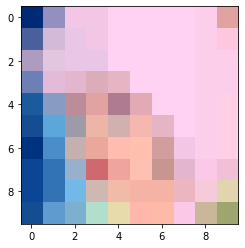

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from math import floor, ceil

# Functions for subtracting value from current color, it has no meaning, but could change your image, 
# so it's possible to create some game where player should find this subtraction value or for example understand what was in the image

def sub_from_pixels(img: np.array, value: int, overflow: bool) -> np.array:
    changed_img = np.zeros(img.shape)
    changed_img = [[[return_color(color=img[i][j][k], value=value, overflow=overflow) for k in range(len(img[i][j]))] for j in range(len(img[i]))] for i in range(len(img))]
    
    return changed_img

def return_color(color: np.array, value: int, overflow: bool) -> np.array:
    return (color - value) if (color - value >= 0) else ((color + 256 - value) if overflow else 0)

# Resizing image using bilinear interpolation
# only for height == width

def resize_bilinear(img: np.array, new_img_size: int) -> np.array:
    new_img_coords = np.zeros((new_img_size, new_img_size, 2))
    new_img_colors = np.zeros((new_img_size, new_img_size, 3))    
    a, b = find_coefs(len(img[0]), new_img_size)
    
    new_img_coords = [[[a * i + b, a * j + b] for j in range(new_img_size)] for i in range(new_img_size)]
    
    return calc_colors(new_img_colors, new_img_coords, img)

def calc_colors(new_img_colors: np.array, new_img_cords: np.array, img: np.array) -> np.array:    
    for i in range(len(new_img_colors)):
        for j in range(len(new_img_colors)):
            if new_img_cords[i][j][1] >=0 and new_img_cords[i][j][0] >= 0 and new_img_cords[i][j][1] < (len(img) - 1) and new_img_cords[i][j][0] < (len(img) - 1):
                
                # calculating the colors for above and below points
                mpl1 = new_img_cords[i][j][1] - floor(new_img_cords[i][j][1])
                q1 = mpl1 * img[floor(new_img_cords[i][j][0]), floor(new_img_cords[i][j][1])] + (1 - mpl1) * img[floor(new_img_cords[i][j][0]), ceil(new_img_cords[i][j][1])]
                q2 = mpl1 * img[ceil(new_img_cords[i][j][0]), floor(new_img_cords[i][j][1])] + (1 - mpl1) * img[ceil(new_img_cords[i][j][0]), ceil(new_img_cords[i][j][1])]
                
                #calculating the value of entire point
                mpl2 = new_img_cords[i][j][0] - floor(new_img_cords[i][j][0])
                q = mpl2 * q1 + (1 - mpl2) * q2
                new_img_colors[i][j] = q
            else:
                
                #for points which has no neighbor points in the 
                new_img_colors[i][j] = img[int(new_img_cords[i][j][0]), int(new_img_cords[i][j][1])]
    
    return new_img_colors           

def find_coefs(prev_size: int, new_size: int) -> (float, float):
    a = float(prev_size / new_size)
    b = -0.5 + 0.5 * a
    return (a, b)
    
    
img = mpimg.imread('images.png')
plt.imshow(img)


Resizing image from 10x10 to 15x15


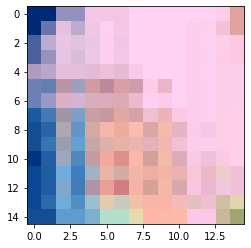

In [3]:
plt.imshow(resize_bilinear(img, 15))

Here is the more complex image which has 170x170 size and photo of toucan.

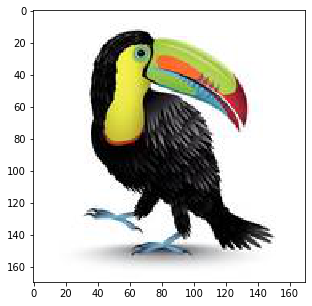

In [4]:
toucan = mpimg.imread('toucan.jpg')
plt.figure(figsize=(5,5))
plt.imshow(toucan)

After resizing it to 270x270 it looks like below

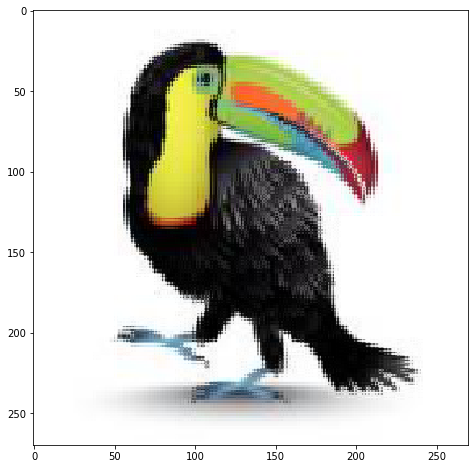

In [5]:
plt.figure(figsize=(8,8))

plt.imshow(np.uint8(resize_bilinear(toucan, 270)))

Example of subtracting 10 from each RGB color of toucan image.

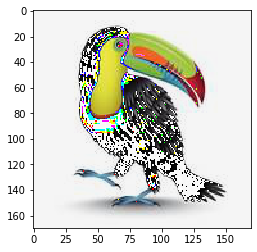

In [6]:
plt.imshow(sub_from_pixels(toucan, 10, True))